In [2]:
install.packages('MatrixEQTL', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
require("MatrixEQTL")

Loading required package: MatrixEQTL


In [4]:
library(MatrixEQTL)


In [5]:
base.dir = find.package('MatrixEQTL');


In [7]:
useModel = modelLINEAR

In [9]:
# Linear model to use, modelANOVA, modelLINEAR, or modelLINEAR_CROSS
useModel = modelLINEAR; # modelANOVA, modelLINEAR, or modelLINEAR_CROSS

# Genotype file name
SNP_file_name = paste(base.dir, "/data/SNP.txt", sep="");
snps_location_file_name = paste(base.dir, "/data/snpsloc.txt", sep="");

# Gene expression file name
expression_file_name = paste(base.dir, "/data/GE.txt", sep="");
gene_location_file_name = paste(base.dir, "/data/geneloc.txt", sep="");

# Covariates file name
# Set to character() for no covariates
covariates_file_name = paste(base.dir, "/data/Covariates.txt", sep="");

# Output file name
output_file_name_cis = tempfile();
output_file_name_tra = tempfile();

# Only associations significant at this level will be saved
pvOutputThreshold_cis = 2e-2;
pvOutputThreshold_tra = 1e-2;

# Error covariance matrix
# Set to numeric() for identity.
errorCovariance = numeric();
# errorCovariance = read.table("Sample_Data/errorCovariance.txt");

# Distance for local gene-SNP pairs
cisDist = 1e6;

In [10]:
snps = SlicedData$new();
snps$fileDelimiter = "\t";      # the TAB character
snps$fileOmitCharacters = "NA"; # denote missing values;
snps$fileSkipRows = 1;          # one row of column labels
snps$fileSkipColumns = 1;       # one column of row labels
snps$fileSliceSize = 2000;      # read file in slices of 2,000 rows
snps$LoadFile(SNP_file_name);

## Load gene expression data

gene = SlicedData$new();
gene$fileDelimiter = "\t";      # the TAB character
gene$fileOmitCharacters = "NA"; # denote missing values;
gene$fileSkipRows = 1;          # one row of column labels
gene$fileSkipColumns = 1;       # one column of row labels
gene$fileSliceSize = 2000;      # read file in slices of 2,000 rows
gene$LoadFile(expression_file_name);

## Load covariates

cvrt = SlicedData$new();
cvrt$fileDelimiter = "\t";      # the TAB character
cvrt$fileOmitCharacters = "NA"; # denote missing values;
cvrt$fileSkipRows = 1;          # one row of column labels
cvrt$fileSkipColumns = 1;       # one column of row labels
if(length(covariates_file_name)>0) {
cvrt$LoadFile(covariates_file_name);
}

Rows read:  15  done.
Rows read:  10  done.
Rows read:  2  done.


In [11]:
snpspos = read.table(snps_location_file_name, header = TRUE, stringsAsFactors = FALSE);
genepos = read.table(gene_location_file_name, header = TRUE, stringsAsFactors = FALSE);

In [14]:
me = Matrix_eQTL_main(
snps = snps, 
gene = gene, 
cvrt = cvrt,
output_file_name     = output_file_name_tra,
pvOutputThreshold     = pvOutputThreshold_tra,
useModel = useModel, 
errorCovariance = errorCovariance, 
verbose = TRUE, 
output_file_name.cis = output_file_name_cis,
pvOutputThreshold.cis = pvOutputThreshold_cis,
snpspos = snpspos, 
genepos = genepos,
cisDist = cisDist,
pvalue.hist = "qqplot",
min.pv.by.genesnp = FALSE,
noFDRsaveMemory = FALSE);

Matching data files and location files 
10 of 10  genes matched
15 of 15  SNPs matched
Task finished in  0.007  seconds
Processing covariates 
Task finished in  0.013  seconds
Processing gene expression data (imputation, residualization, etc.) 
Task finished in  0.002  seconds
Creating output file(s) 
Task finished in  0.068  seconds
Performing eQTL analysis 
100.00% done, 2 cis-eQTLs, 3 trans-eQTLs
Task finished in  0.052  seconds
 


Analysis done in:  0.121  seconds 
Detected local eQTLs: 
    snps    gene statistic       pvalue          FDR      beta
1 Snp_05 Gene_03 38.812160 5.515519e-14 5.515519e-12 0.4101317
2 Snp_04 Gene_10  3.201666 7.608981e-03 3.804491e-01 0.2321123
Detected distant eQTLs: 
    snps    gene statistic      pvalue       FDR       beta
1 Snp_13 Gene_09 -3.914403 0.002055817 0.1027908 -0.2978847
2 Snp_11 Gene_06 -3.221962 0.007327756 0.1619451 -0.2332470
3 Snp_14 Gene_01  3.070005 0.009716705 0.1619451  0.2147077


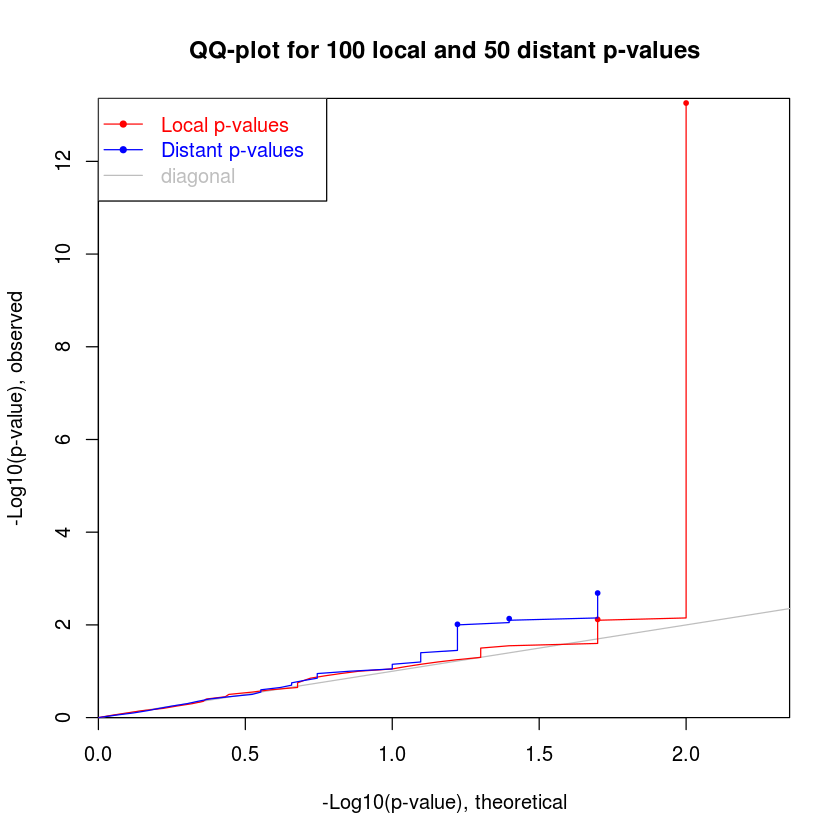

In [15]:
unlink(output_file_name_tra);
unlink(output_file_name_cis);

## Results:

cat('Analysis done in: ', me$time.in.sec, ' seconds', '\n');
cat('Detected local eQTLs:', '\n');
show(me$cis$eqtls)
cat('Detected distant eQTLs:', '\n');
show(me$trans$eqtls)

## Plot the Q-Q plot of local and distant p-values

plot(me)

    snps    gene statistic       pvalue          FDR      beta
1 Snp_05 Gene_03 38.812160 5.515519e-14 5.515519e-12 0.4101317
2 Snp_04 Gene_10  3.201666 7.608981e-03 3.804491e-01 0.2321123


In [18]:
table = read.csv("~/Downloads//gdac.broadinstitute.org_ACC.Mutation_Packager_Oncotated_Calls.Level_3.2016012800.0.0/TCGA-OR-A5J1-01.hg19.oncotator.hugo_entrez_remapped.maf.txt",row.names=2)

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : duplicate 'row.names' are not allowed


In [22]:
source("https://bioconductor.org/biocLite.R")
biocLite("biomaRt")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘biomaRt’
also installing the dependencies ‘memoise’, ‘plogr’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘XML’, ‘RCurl’, ‘AnnotationDbi’

Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘RCurl’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘Biobase’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘RSQLite’ had non-zero exit status”Warning message in install.packages(pkgs = doing, lib = lib, ...)

In [23]:
biomart

ERROR: Error in eval(expr, envir, enclos): object 'biomart' not found


In [ ]:
#need a way to convert 